In [0]:
import os, sys
#from IPython.display import display
#from IPython.display import Image as _Imgdis
#from PIL import Image
import numpy as np
from keras.preprocessing.image import array_to_img, img_to_array, load_img
import keras
from keras.layers import Dense,Dropout
from keras.layers import Conv2D,MaxPooling2D,Input,UpSampling2D
from keras.models import Model
from keras import activations
import tensorflow as tf
from keras import activations

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Data import


In [7]:
folder=r"/content/drive/My Drive/Imagenet3000"
folder2=r"/content/drive/My Drive/coco_3000"
#hf=r"/media/titanxpascal/ACER DATA/COMPRESSION/divanshu/cocoheatmaps_5500"
onlyfiles = [f1 for f1 in sorted(os.listdir(folder)) if os.path.isfile(os.path.join(folder, f1))]
onlyfiles2 = [f1 for f1 in sorted(os.listdir(folder2)) if os.path.isfile(os.path.join(folder2, f1))]
#onlyfiles1 = [f2 for f2 in sorted(os.listdir(hf)) if os.path.isfile(os.path.join(hf, f2))]
#onlyfiles1.sort()
onlyfiles.sort()
onlyfiles2.sort()
xdataset=np.ndarray(shape=(2000,224,224,3),dtype=np.float32)
xgradds=np.ndarray(shape=(2000,224,224,3),dtype=np.float32)
vxdataset=np.ndarray(shape=(200,224,224,3),dtype=np.float32)
vgradds=np.ndarray(shape=(200,224,224,3),dtype=np.float32)
xtestset=np.ndarray(shape=(100,224,224,3),dtype=np.float32)
tgradds=np.ndarray(shape=(100,224,224,3),dtype=np.float32)
for i in range(2200,2300):
    if(i==1):
        print('pass')
    ft=folder + "/" + onlyfiles[i]
    ft1=folder2 + "/" + onlyfiles2[i]
    im0=load_img(ft,target_size=(224,224))
    im1=load_img(ft1,target_size=(224,224))
    x=img_to_array(im0)
    y=img_to_array(im1)
    y/=255.0
    x/=255.0 
    if(i<2000):
        xgradds[i]=y
        xdataset[i]=x
        if(i==0):
            print("suucess")   
    elif(i<2200):
        vgradds[i-2000]=y
        vxdataset[i-2000]=x
    else:
        tgradds[i-2200]=y
        xtestset[i-2200]=x
    print(i)
x=None
lab_image=None
im=None
onlyfiles=[]
print(xdataset.shape)

2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224
2225
2226
2227
2228
2229
2230
2231
2232
2233
2234
2235
2236
2237
2238
2239
2240
2241
2242
2243
2244
2245
2246
2247
2248
2249
2250
2251
2252
2253
2254
2255
2256
2257
2258
2259
2260
2261
2262
2263
2264
2265
2266
2267
2268
2269
2270
2271
2272
2273
2274
2275
2276
2277
2278
2279
2280
2281
2282
2283
2284
2285
2286
2287
2288
2289
2290
2291
2292
2293
2294
2295
2296
2297
2298
2299
(2000, 224, 224, 3)


In [0]:
#hiding network

In [0]:
inp_1=Input(shape=(224,224,3))
inp_2=Input(shape=(224,224,3))
block1=keras.layers.concatenate([inp_2,inp_1])

conv3_1=Conv2D(50,(3,3),activation="relu",name="31",padding="same")(block1)
conv3_2=Conv2D(50,(3,3),activation="relu",name="32",padding="same")(conv3_1)
conv3_3=Conv2D(50,(3,3),activation="relu",name="33",padding="same")(conv3_2)
conv3_4=Conv2D(50,(3,3),activation="relu",name="34",padding="same")(conv3_3)

conv4_1=Conv2D(50,(4,4),activation="relu",name="41",padding="same")(block1)
conv4_2=Conv2D(50,(4,4),activation="relu",name="42",padding="same")(conv4_1)
conv4_3=Conv2D(50,(4,4),activation="relu",name="43",padding="same")(conv4_2)
conv4_4=Conv2D(50,(4,4),activation="relu",name="44",padding="same")(conv4_3)

conv5_1=Conv2D(50,(5,5),activation="relu",name="51",padding="same")(block1)
conv5_2=Conv2D(50,(5,5),activation="relu",name="52",padding="same")(conv5_1)
conv5_3=Conv2D(50,(5,5),activation="relu",name="53",padding="same")(conv5_2)
conv5_4=Conv2D(50,(5,5),activation="relu",name="54",padding="same")(conv5_3)

concat_1=keras.layers.concatenate([conv3_4,conv4_4,conv5_4])


conv3_5=Conv2D(50,(3,3),activation='relu',name='35',padding='same')(concat_1)
conv4_5=Conv2D(50,(4,4),activation='relu',name='45',padding='same')(concat_1)
conv5_5=Conv2D(50,(5,5),activation='relu',name='55',padding='same')(concat_1)
concat_2=keras.layers.concatenate([conv5_5,conv4_5,conv3_5])
hidden=Conv2D(3,(1,1),activation="relu",name="hiddenoutput",padding="same")(concat_2)

hiding=Model([inp_1,inp_2],hidden)
hiding.summary()






Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 224, 224, 6)  0           input_2[0][0]                    
                                                                 input_1[0][0]                    
__________________________________________________________________________________________________
31 (Conv2D)                     (None, 224, 224, 50) 2750        concatenate_1[0][0]     

In [0]:
#Reveal Network

In [0]:
conv3_1=Conv2D(50,(3,3),activation="relu",name="r31",padding="same")(hidden)
conv3_2=Conv2D(50,(3,3),activation="relu",name="r32",padding="same")(conv3_1)
conv3_3=Conv2D(50,(3,3),activation="relu",name="r33",padding="same")(conv3_2)
conv3_4=Conv2D(50,(3,3),activation="relu",name="r34",padding="same")(conv3_3)



conv4_1=Conv2D(50,(4,4),activation="relu",name="r41",padding="same")(hidden)
conv4_2=Conv2D(50,(4,4),activation="relu",name="r42",padding="same")(conv4_1)
conv4_3=Conv2D(50,(4,4),activation="relu",name="r43",padding="same")(conv4_2)
conv4_4=Conv2D(50,(4,4),activation="relu",name="r44",padding="same")(conv4_3)



conv5_1=Conv2D(50,(5,5),activation="relu",name="r51",padding="same")(hidden)
conv5_2=Conv2D(50,(5,5),activation="relu",name="r52",padding="same")(conv5_1)
conv5_3=Conv2D(50,(5,5),activation="relu",name="r53",padding="same")(conv5_2)
conv5_4=Conv2D(50,(5,5),activation="relu",name="r54",padding="same")(conv5_3)

concat_1=keras.layers.concatenate([conv3_4,conv4_4,conv5_4])



conv5_5=Conv2D(50,(5,5),activation='relu',name='r35',padding='same')(concat_1)
conv4_5=Conv2D(50,(4,4),activation='relu',name='r45',padding='same')(concat_1)
conv3_5=Conv2D(50,(3,3),activation='relu',name='r55',padding='same')(concat_1)


concat_2=keras.layers.concatenate([conv5_5,conv4_5,conv3_5])


reveal=Conv2D(3,(1,1),activation="relu",name="revealoutput",padding="same")(concat_2)




joint_Model=Model([inp_1,inp_2],[hidden,reveal])
joint_Model.summary()





Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 224, 224, 6)  0           input_2[0][0]                    
                                                                 input_1[0][0]                    
__________________________________________________________________________________________________
31 (Conv2D)                     (None, 224, 224, 50) 2750        concatenate_1[0][0]        

In [0]:
joint_Model.compile(optimizer='adam',loss='mse')
history=joint_Model.fit([xdataset,xgradds],[xdataset,xgradds],validation_data=([vxdataset,vgradds],[vxdataset,vgradds]),epochs=40,verbose=1,batch_size=1)






Train on 2000 samples, validate on 200 samples
Epoch 1/40








KeyboardInterrupt



In [0]:
print("hello")

In [0]:
joint_Model.save("/content/drive/My Drive/stegov2.h5")

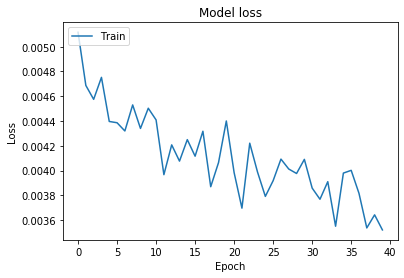

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()


In [0]:
hide,reveal=joint_Model.predict([xtestset,tgradds])

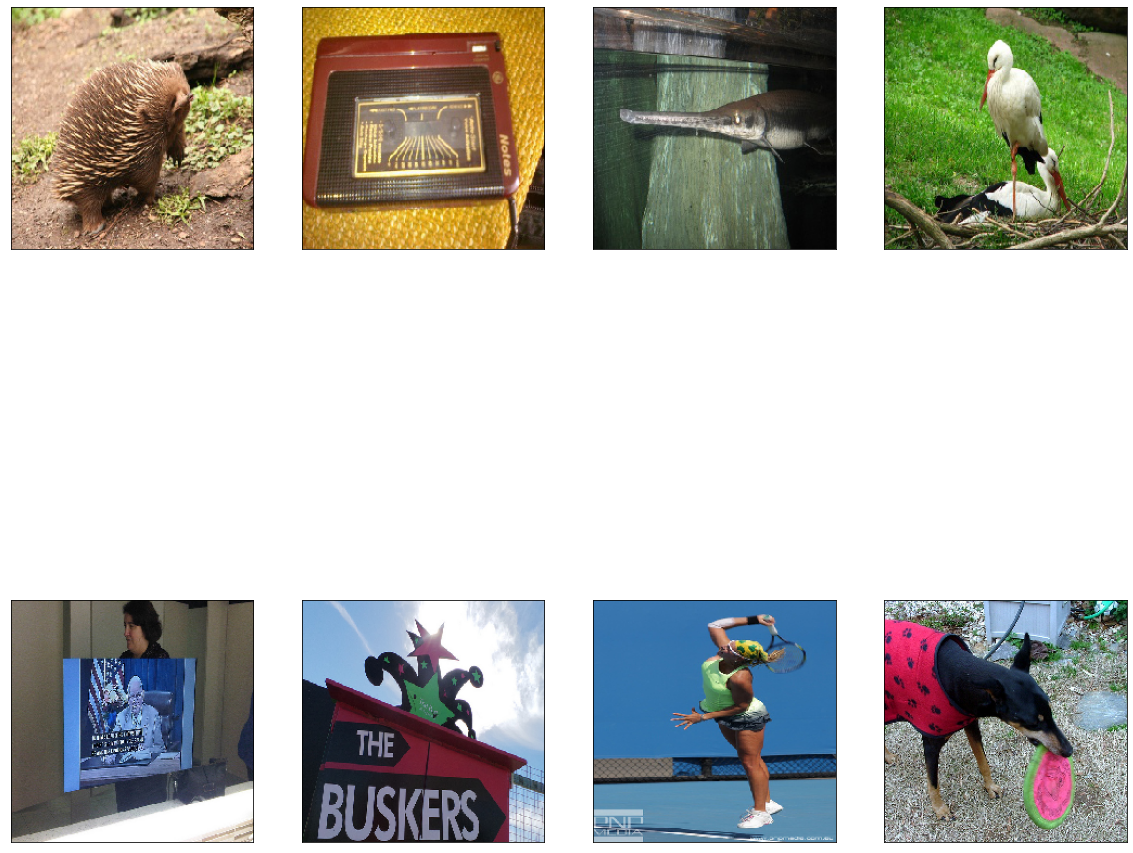

In [10]:
import matplotlib.pyplot as plt
n = 4
plt.figure(figsize=(20, 20))
for i in range(0,n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(xtestset[i].reshape(224,224,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(tgradds[i].reshape(224,224,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


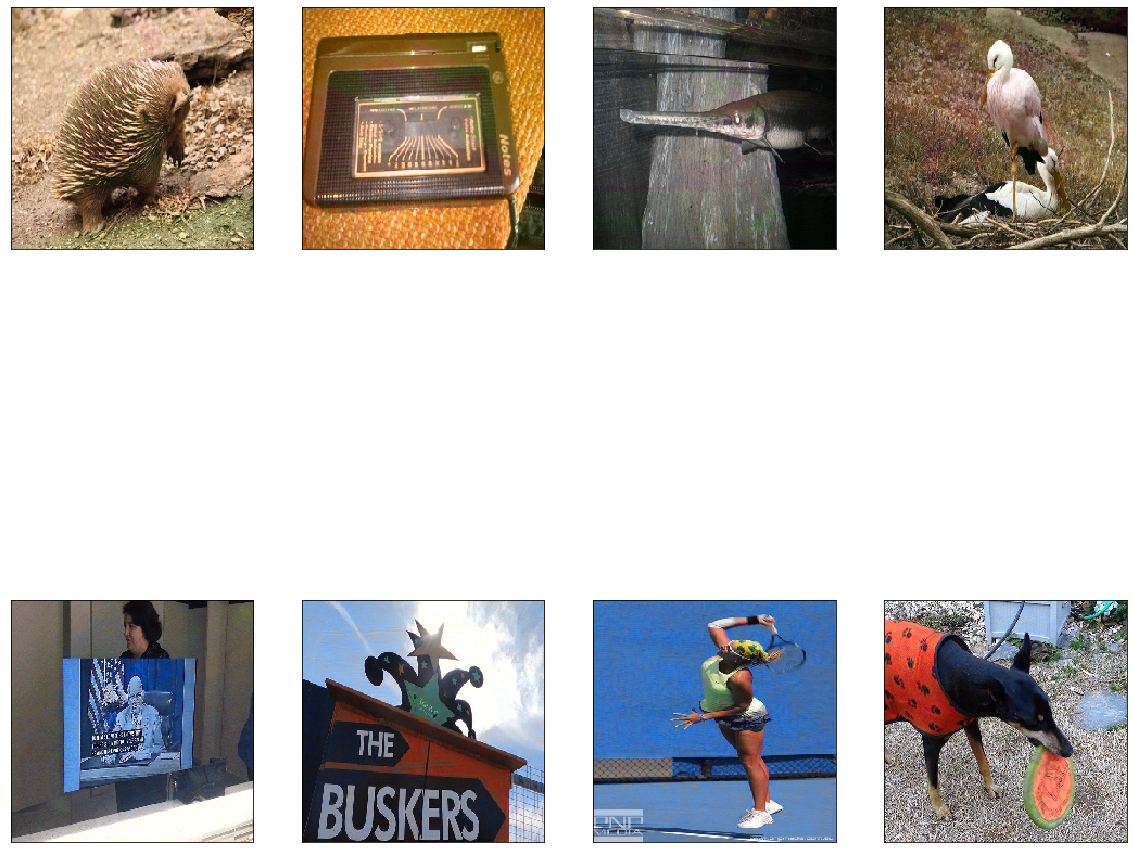

In [0]:
import matplotlib.pyplot as plt
n = 4
plt.figure(figsize=(20, 20))
for i in range(0,n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(hide[i].reshape(224,224,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(reveal[i].reshape(224,224,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
from PIL import Image
for i in range(100):
  im = Image.fromarray((xtestset[i] * 255).astype(np.uint8))
  #im = Image.fromarray(xtestset)
  im.save("/content/drive/My Drive/xtestset/{0}.jpeg".format("img"+str(i)))

In [0]:
im = Image.fromarray((hide[0] * 255).astype(np.uint8))
im.save("/content/drive/My Drive/img2.jpeg")

In [0]:
from keras.models import load_model
 
# load model
#model = load_model('model.h5')
joint_Model=load_model("/content/drive/My Drive/stegov2.h5")

In [0]:
for i in range(3):
  for j in range(224):
    for k in range(224):
      if hide[k][j][i]>1:
        hide[k][j][i]=1

ValueError: ignored

In [0]:
import matplotlib.pyplot
import cv2
for i in range(100):
   
#     in_loc = 'test_images'
    out_loc ="/content/drive/My Drive/hide/{0}".format("img"+str(i))
    val_psnr = []
    val_ssim = []
    val = []
   
#     for im_loc in (os.listdir(in_loc)):
#         adr = in_loc + '/' + im_loc

    X = []
    img =hide[i]
    m, n = img.shape[0], img.shape[1]

    flag = 0
    if m%2!=0:
        flag = 1
        m = m - 1

    if n%2!=0:
        flag = 1
        n = n - 1

    img = cv2.resize(img, (m, n))

    X.append(img)
    X = np.array(X)
    Y=np.amax(X)
    X/=Y
    X = X.astype('float32')
   # X = X * 255

    matplotlib.pyplot.imsave(out_loc+'in.jpeg', X[0], cmap = 'gray')


In [0]:
import numpy, cv2 as cv
#c = cv2.imread('color_img.jpg', 1)
f=open('/content/drive/My Drive/result.txt','w')
for i in range(100):
  src_test1 = cv.imread("/content/drive/My Drive/xtestset/{0}.jpeg".format("img"+str(i)))
  src_test2 = cv.imread("/content/drive/My Drive/hide/{0}.jpeg".format("img"+str(i)+"in"))
  if src_test1 is None or src_test2 is None:
      print('Could not open or find the images!')
      exit(0)
  hsv_test1 = cv.cvtColor(src_test2, cv.COLOR_RGB2HSV)
  hsv_base = cv.cvtColor(src_test1, cv.COLOR_RGB2HSV)

  h_bins = 50
  s_bins = 60
  histSize = [h_bins, s_bins]
  # hue varies from 0 to 179, saturation from 0 to 255
  h_ranges = [0, 180]
  s_ranges = [0, 256]
  ranges = h_ranges + s_ranges # concat lists
  # Use the 0-th and 1-st channels
  channels = [0, 1]

  hist_base = cv.calcHist([hsv_base], channels, None, histSize, ranges, accumulate=False)
  cv.normalize(hist_base, hist_base, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)
  #hist_half_down = cv.calcHist([hsv_half_down], channels, None, histSize, ranges, accumulate=False)
  #cv.normalize(hist_half_down, hist_half_down, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)
  hist_test1 = cv.calcHist([hsv_test1], channels, None, histSize, ranges, accumulate=False)
  cv.normalize(hist_test1, hist_test1, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)
  #hist_test2 = cv.calcHist([hsv_test2], channels, None, histSize, ranges, accumulate=False)
  #cv.normalize(hist_test2, hist_test2, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)
  f.write("Image{0}\n".format("image"+str(i)))
  for compare_method in range(4):
      base_base = cv.compareHist(hist_base, hist_base, compare_method)
      #base_half = cv.compareHist(hist_base, hist_half_down, compare_method)
      base_test1 = cv.compareHist(hist_base, hist_test1, compare_method)
      #base_test2 = cv.compareHist(hist_base, hist_test2, compare_method)
      
      s=('Method:', compare_method, 'Perfect, Base-Test(1) :',\
            base_base, '/', base_test1)
      f.write(str(s)+"\n")
  f.write("\n\n\n")
f.close()